## Data Exploration

In [2]:
# import modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# load in required dataset 
df = pd.read_csv("data.csv")

In [5]:
# check the number of rows and columns of the dataset
df.shape

(6362620, 11)

In [4]:
# this dataframe is quite large -- let's take a sample to make it more managable...
    
df_sample = df.sample(n=1000000)

In [9]:
# print the first 5 rows of dataset
df_sample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3812694,281,PAYMENT,5574.20,C1265369607,320097.00,314522.80,M1934590525,0.00,0.0,0,0
631798,35,CASH_OUT,24696.77,C1765039385,0.00,0.00,C1781790425,872092.23,896789.0,0,0
5712059,398,PAYMENT,4387.84,C1794565403,0.00,0.00,M431215912,0.00,0.0,0,0
5549103,382,PAYMENT,9141.42,C1892556488,130757.32,121615.91,M425397923,0.00,0.0,0,0
4466611,324,PAYMENT,3358.62,C1334350914,0.00,0.00,M269204536,0.00,0.0,0,0


In [10]:
# print the datatypes of each column
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 3812694 to 5835167
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1000000 non-null  int64  
 1   type            1000000 non-null  object 
 2   amount          1000000 non-null  float64
 3   nameOrig        1000000 non-null  object 
 4   oldbalanceOrg   1000000 non-null  float64
 5   newbalanceOrig  1000000 non-null  float64
 6   nameDest        1000000 non-null  object 
 7   oldbalanceDest  1000000 non-null  float64
 8   newbalanceDest  1000000 non-null  float64
 9   isFraud         1000000 non-null  int64  
 10  isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 91.6+ MB


In [11]:
# check for missing values
df_sample.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# check for outliers

## Univariate Exploratory Analysis

<Axes: xlabel='type'>

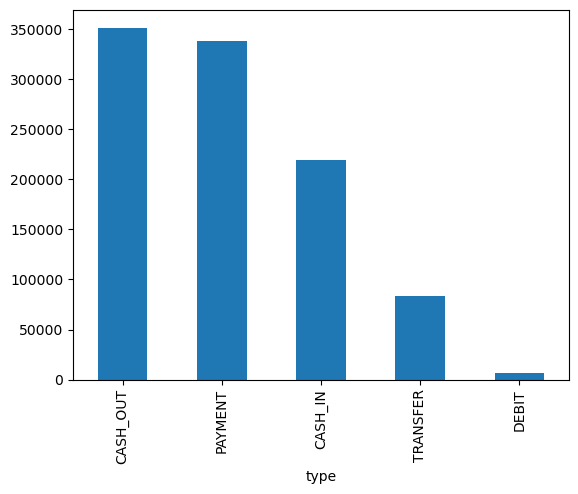

In [5]:
# barplot of type of transaction
df_sample['type'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

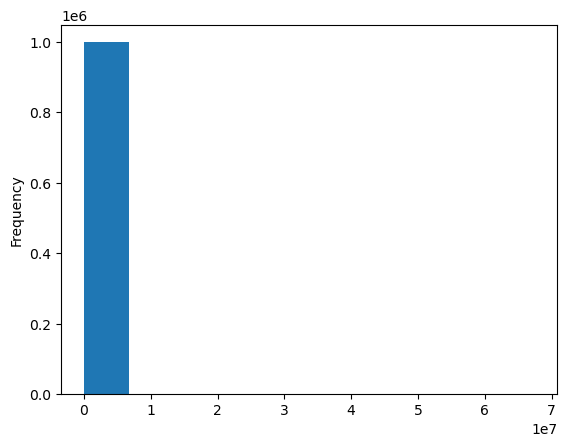

In [8]:
# histogram of the amount of money transferred
df_sample["amount"].plot.hist()

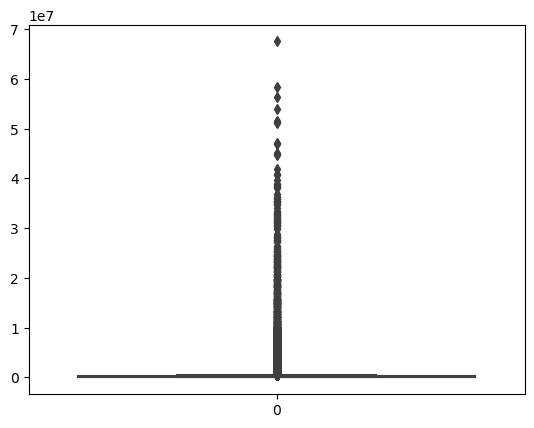

In [20]:
# boxplot of the amount of money transferred
sns.boxplot(df_sample["amount"])
plt.show()

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

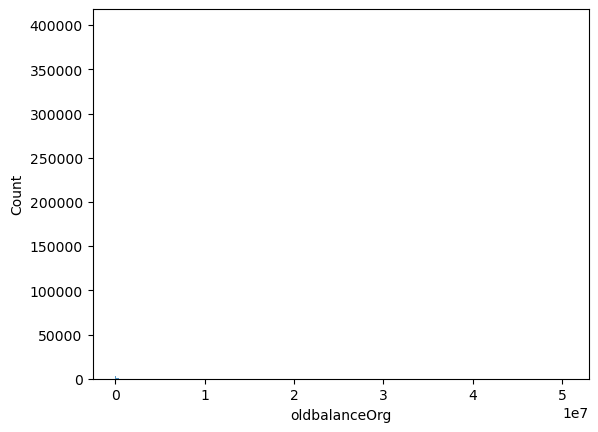

In [21]:
# histogram of origin accounts balance before the transaction
sns.histplot(df_sample["oldbalanceOrg"])

<Axes: xlabel='newbalanceOrig', ylabel='Count'>

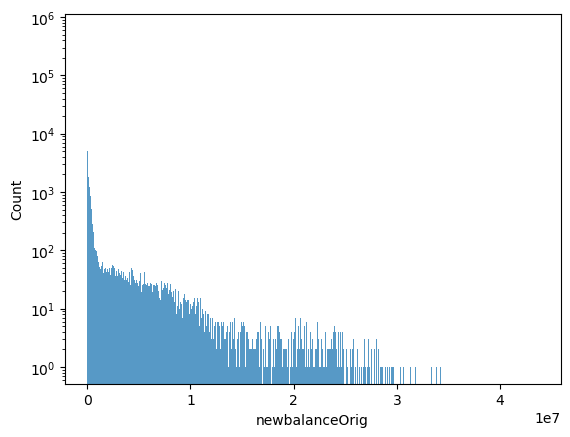

In [23]:
# histogram of origin accounts balance after the transaction
sns.histplot(df_sample['newbalanceOrig'], log=True)

<Axes: xlabel='oldbalanceDest', ylabel='Count'>

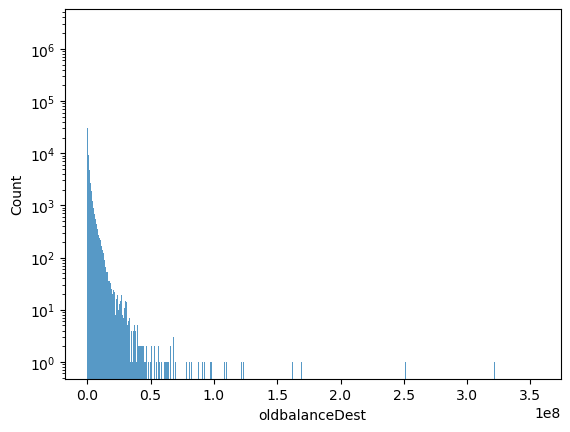

In [31]:
# histogram of destination accounts balance before the transaction
sns.histplot(df_sample['oldbalanceDest'], log=True)

<Axes: xlabel='newbalanceDest', ylabel='Count'>

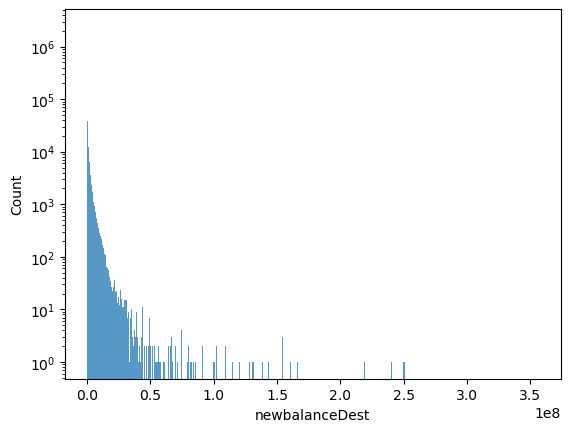

In [32]:
# histogram of destination accounts balance after the transaction
sns.histplot(df_sample['newbalanceDest'], log=True)

<Axes: xlabel='isFlaggedFraud', ylabel='Count'>

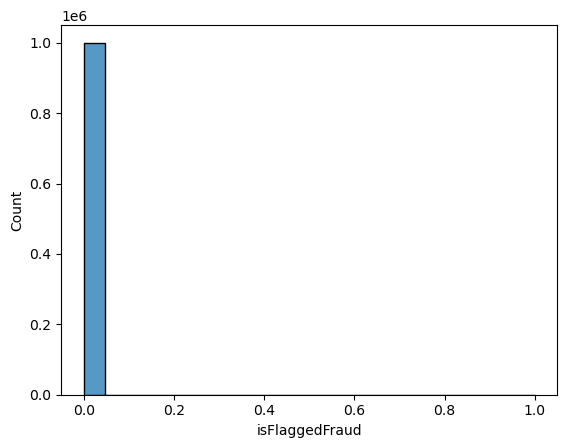

In [13]:
# horizontal barplot of column "isFlaggedFraud"
sns.histplot(df_sample['isFlaggedFraud'])
#df['isFlaggedFraud'].value_counts().plot(kind='bar')

## Bivariate Exploratory Analysis

In [ ]:
# boxplot for 'oldBalanceOrg' where hue = type


In [ ]:
# boxplot for 'newBalanceOrg' where hue = type

<Axes: >

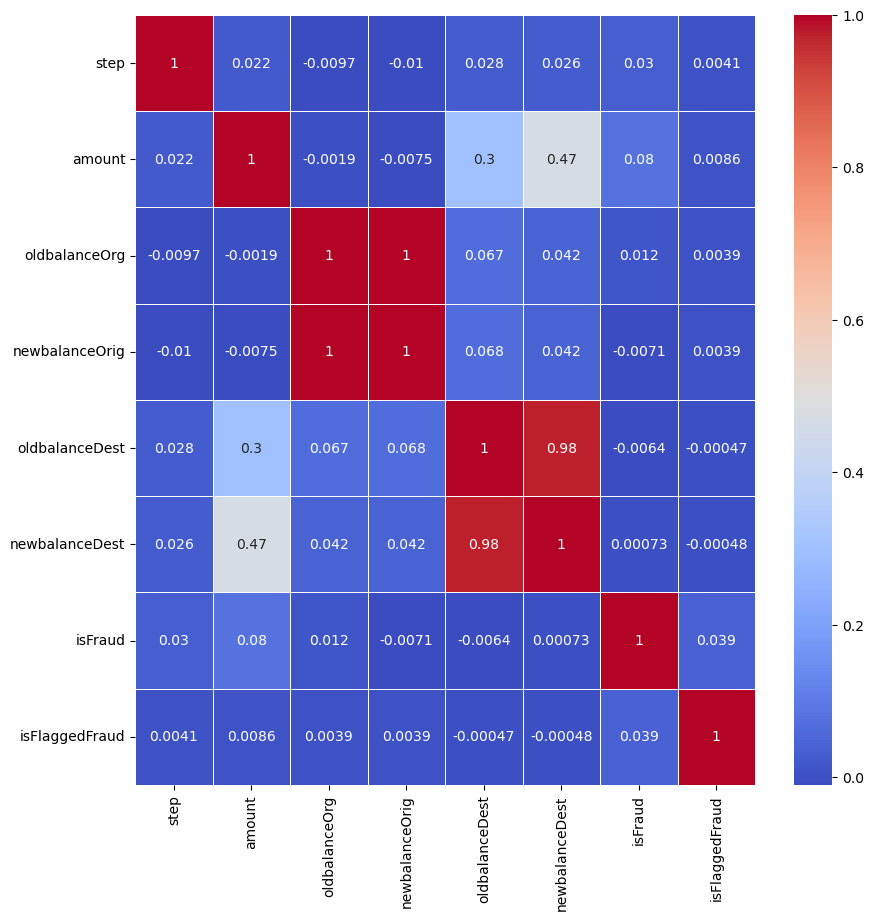

In [28]:
# correlation matrix
corr_matrix = df_sample.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True, linewidths=0.5)